# **k-Neareset Neighbors**

In this notebook we will look at **k-Neareset Neighbors**.

Do some imports.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
# https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.preprocessing import StandardScaler
# https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

from matplotlib.colors import ListedColormap

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve

# **Part 1: REGRESSION**

The data.

In [ ]:
np.random.seed(42)
n = 100
X = 6 * np.random.rand(n, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(n, 1)

Create the model.

In [18]:
knn = KNeighborsRegressor(n_neighbors=10)
#knn = KNeighborsRegressor(n_neighbors=10, weights='distance')
knn.fit(X, y)

KNeighborsRegressor(n_neighbors=10)

Plot it.

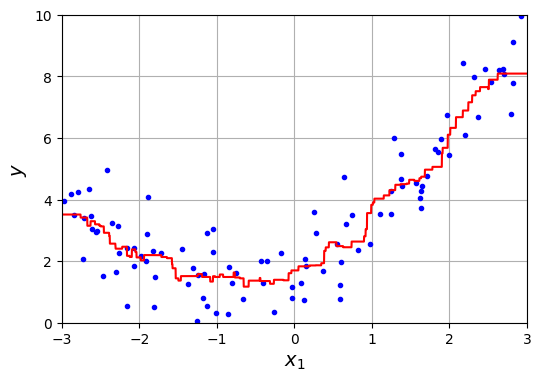

In [19]:
X_plot = np.linspace(-3, 3, 5000).reshape(5000, 1)
yHat = knn.predict(X_plot)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_plot, yHat, "r-")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Evaluate it.

In [15]:
yHat = cross_val_predict(knn, X, y, cv=10)

print('MAE: ', mean_absolute_error(y, yHat))
print('MSE: ', mean_squared_error(y, yHat))
print('RMSE:', root_mean_squared_error(y, yHat))
print('R2:  ', r2_score(y, yHat))

MAE:  0.7811714259928344
MSE:  0.98228031311966
RMSE: 0.9911005565126376
R2:   0.8135860851695909


# **Part 2: CLASSIFICATION**

For this notebook we will use the **Iris dataset**.

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()

For demonstration purposes, we will work only with the third column (petal length) and will make it into a binary classification task: Virginica vs. Others.

In [21]:
X = iris.data[:, 3].reshape(-1, 1)  # take third column and reshape to get a column vector
y = iris.target_names[iris.target] == 'virginica'  # make it into binary classification with Virginica vs. Others

Create k-NN model.

In [34]:
knn = KNeighborsClassifier(n_neighbors=10)
#knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=10)

Plot it.

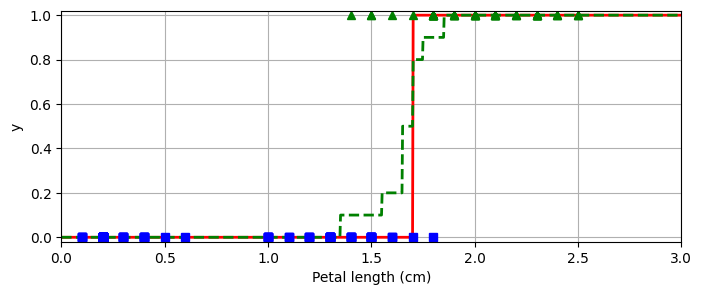

In [35]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = knn.predict_proba(X_new)
yHat = knn.predict(X_new)

plt.figure(figsize=(8, 3))
plt.plot(X_new, yHat, "r", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g--", linewidth=2)

plt.plot(X[y == 0], y[y == 0], "bs")
plt.plot(X[y == 1], y[y == 1], "g^")
plt.xlabel("Petal length (cm)")
plt.ylabel("y")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
plt.show()

Evaluate it.

In [36]:
yHat = cross_val_predict(knn, X, y, cv=10)

In [37]:
confusion_matrix(y, yHat)

array([[98,  2],
       [ 5, 45]])

In [38]:
print('Evaluation for the positive class:')
print('Precision:', precision_score(y, yHat))
print('Recall:   ', recall_score(y, yHat))
print('F1:       ', f1_score(y, yHat))

Evaluation for the positive class:
Precision: 0.9574468085106383
Recall:    0.9
F1:        0.9278350515463918


In [39]:
print('Overall evaluation:')
print('Accuracy: ', accuracy_score(y, yHat))
print('Precision:', precision_score(y, yHat, average='macro'))
print('Recall:   ', recall_score(y, yHat, average='macro'))
print('F1:       ', f1_score(y, yHat, average='macro'))

Overall evaluation:
Accuracy:  0.9533333333333334
Precision: 0.9544515595951251
Recall:    0.94
F1:        0.946676146462851


## **Precision/Recall Trade-off**

To plot Precision and Recall, we will be using `cross_val_predict` with the `predict_proba` function to compute probability of Class 1 for each data point.

In [40]:
y_prob = cross_val_predict(knn, X, y, cv=10, method="predict_proba")[:, 1]

Now we can use those probabilities to get Precisions and Recalls for all possible thresholds.

In [41]:
precisions, recalls, thresholds = precision_recall_curve(y, y_prob)

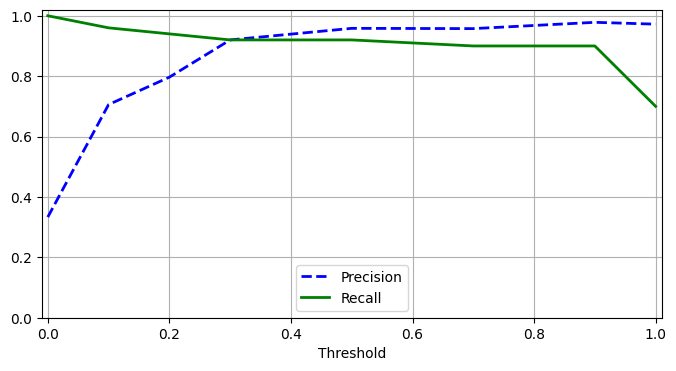

In [42]:
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="lower center")
plt.axis([-0.01, 1.01, 0, 1.02])
plt.show()

Now let's plot the Precision-Recall curve.

Click <a href="https://www.researchgate.net/figure/The-precision-recall-curve-of-the-YOLOv7-AC-model-on-the-URPC-d-The-precision-recall_fig3_369471469" target="_blank">here</a> to see some other examples of Precision-Recall curves. They can be a nice way to visualize your results and make further conclusions.

It is desired that a model should have both high Precision and high Recall. However, most of the time it involves a trade-off between the two.

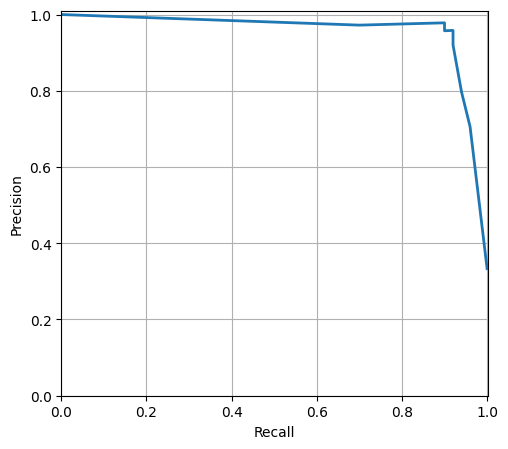

In [43]:
plt.figure(figsize=(5.5, 5))
plt.plot(recalls, precisions, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1.001, 0, 1.01])
plt.grid()
plt.show()

# **KNN with two features**

For this demonstration, we will take features 2 and 3.

In [44]:
X = iris.data[:, (2, 3)]
y = iris.target_names[iris.target] == 'versicolor'

And we will standardize the data.

In [45]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Create a model.

In [58]:
knn = KNeighborsClassifier(n_neighbors=10)
#knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=10, weights='distance')

Plot it.

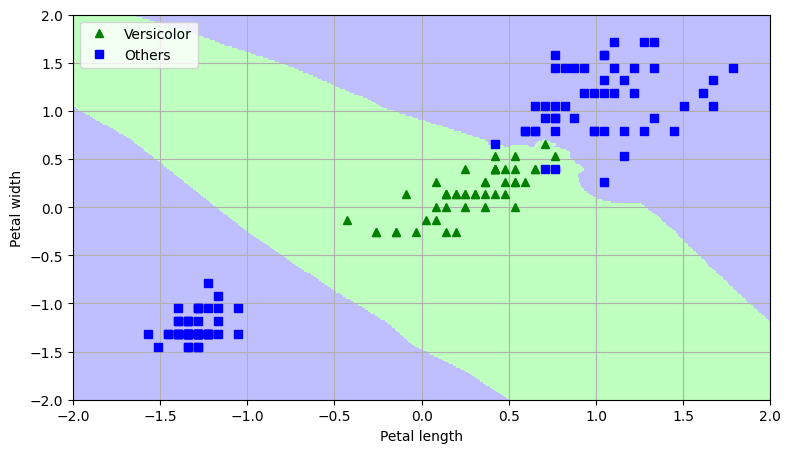

In [59]:
# to plot the decision boundaries, we have to create a grid of x0,x1 values
x0, x1 = np.meshgrid(np.linspace(-2, 2, 500).reshape(-1, 1), np.linspace(-2, 2, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

# predict y for each x0,x1 and reshape back to grid
zz = knn.predict(X_new).reshape(x0.shape)

plt.figure(figsize=(9, 5))
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^", label="Versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Others")

custom_cmap = ListedColormap(["#bfbfff", "#bfffbf"])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid()
plt.show()

Evaluate it.

In [60]:
yHat = cross_val_predict(knn, X, y, cv=10)

In [61]:
confusion_matrix(y, yHat)

array([[96,  4],
       [ 2, 48]])

In [62]:
print('Evaluation for the positive class:')
print('Precision:', precision_score(y, yHat))
print('Recall:   ', recall_score(y, yHat))
print('F1:       ', f1_score(y, yHat))

Evaluation for the positive class:
Precision: 0.9230769230769231
Recall:    0.96
F1:        0.9411764705882353


In [63]:
print('Overall evaluation:')
print('Accuracy: ', accuracy_score(y, yHat))
print('Precision:', precision_score(y, yHat, average='macro'))
print('Recall:   ', recall_score(y, yHat, average='macro'))
print('F1:       ', f1_score(y, yHat, average='macro'))

Overall evaluation:
Accuracy:  0.96
Precision: 0.9513343799058085
Recall:    0.96
F1:        0.9554367201426025


# **KNN with all three classes**

Now let's try the same processing with all three classes that the dataset offers.

In [64]:
X = iris.data[:, (2, 3)]
y = iris.target

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [65]:
knn = KNeighborsClassifier(n_neighbors=10)
#knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=10)

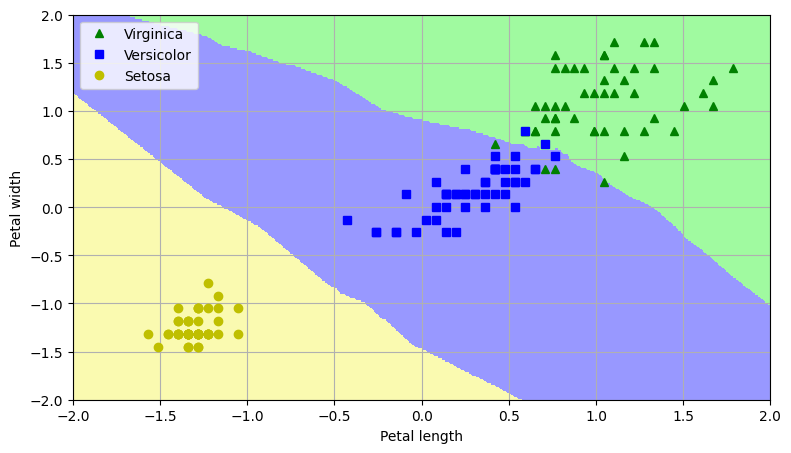

In [66]:
x0, x1 = np.meshgrid(np.linspace(-2, 2, 500).reshape(-1, 1), np.linspace(-2, 2, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

zz =  knn.predict(X_new).reshape(x0.shape)

plt.figure(figsize=(9, 5))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Setosa")

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [67]:
yHat = cross_val_predict(knn, X, y, cv=10)

In [68]:
confusion_matrix(y, yHat)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  4, 46]])

In [69]:
print('Accuracy: ', accuracy_score(y, yHat))
print('Precision:', precision_score(y, yHat, average='macro'))
print('Recall:   ', recall_score(y, yHat, average='macro'))
print('F1:       ', f1_score(y, yHat, average='macro'))

Accuracy:  0.9666666666666667
Precision: 0.9677505687140372
Recall:    0.9666666666666667
F1:        0.9666366396423447


---
*Notebook by Gints Jēkabsons*

*Some parts of the code are based on the book <a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/" target="_blank">“Hands-On Machine Learning”</a> and it's <a href="https://github.com/ageron/handson-ml3" target="_blank">GitHub repo.</a>*